### 모듈 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

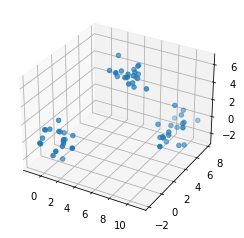

In [2]:
# 데이터 생성
points = [np.random.randn(3) for _ in range(20)]
points.extend([np.random.randn(3) + np.array([5,5,5]) for _ in range(20)])
points.extend([np.random.randn(3) + np.array([10,5,0]) for _ in range(20)])

points = np.array(points)

fig = plt.figure()
ax = fig.gca(projection='3d')

# 좌표 설정
X = points[:,0]
Y = points[:,1]
Z = points[:,2]

# 3차원으로 그림
ax.scatter(X,Y,Z)
plt.show()

### In sklearn

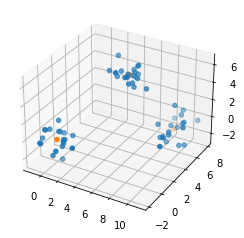

In [3]:
# 사이킷런의 방법
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(points)
# print(kmeans.labels_)
# print(kmeans.cluster_centers_)

centroids = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.gca(projection='3d')

# 3차원으로 그림
ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2])

plt.show()

### 직접 구현

In [10]:
k = 3
max_iters = 10
n_points = points.shape[0]

# 유클리디안 거리를 측정하는함수 생성
def euclidean_distance(a,b):
    return ((a - b) ** 2).sum()**0.5

def kmeans(point, k, max_iters=10):
    # 1. cluster centers를 랜덤하게 생성한다.
    cluster_centers = points[np.random.choice(n_points, k, replace=False)]

    for iter in range(max_iters):

        # 2. 각각의 poimt마다 어떤 cluster와 가장 가까운지 계산 및 할당
        labels = []
        for p in points:
            min_dist = np.inf
            min_cid = -1
            for cid, c in enumerate(cluster_centers):
                dist = euclidean_distance(p, c)
                if dist < min_dist:
                    min_dist = dist
                    min_cid = cid
            labels.append(min_cid)
        labels = np.array(labels)

        # 3. 새로운 label을 이용해서, cluster_centers 새로 계산

        # 같은 클러스터에 속한 점들(a.k.a 같은 cluster_centers와 가장 가까운 점들)을 평균내고싶다

        new_cluster_centers = np.zeros_like(cluster_centers)
        counts = np.zeros(k)

        for l,p in zip(labels, points):
            new_cluster_centers[l] += p
            counts[l] += 1
        for i in range(k):
            new_cluster_centers[i] /= counts[i]

        print('iteration #',iter)

        if np.array_equal(cluster_centers, new_cluster_centers):
            break
        else:
            cluster_centers = new_cluster_centers
    return labels, cluster_centers

### 확인 후 시각화

In [11]:
# 위에서 했던 시각화 실행
labels , cluster_centers = kmeans(points,2)

iteration # 0
iteration # 1
iteration # 2
iteration # 3


In [13]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
cluster_centers

array([[ 7.22640609,  4.9669734 ,  2.13343859],
       [-0.08278753,  0.28949557, -0.17867353]])

In [14]:
def cos(u1, u2):
    denom = np.sqrt(np.sum(u1 ** 2) * np.sum(u2 ** 2))
    if denom != 0:
        return np.sum(u1 * u2)/denom
    else:
        return 0

In [18]:
cos(cluster_centers[0],cluster_centers[1])

0.14509909507182908

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# 3차원으로 그림
ax.scatter(points[:,0],points[:,1],points[:,2])
ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2])

plt.show()

iteration # 0
iteration # 1
iteration # 2


### 내 이미지로 실행해봄

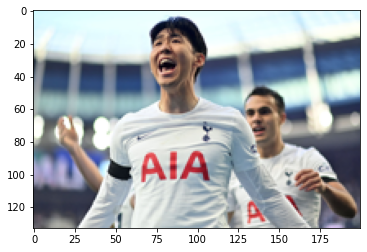

In [133]:
# 이미지를 불러와서 실행
from PIL import Image

img = Image.open('sony.jpg')

width = 200
height = int(img.height * width / img.width)

img = img.resize((width, height))

plt.imshow(img)
plt.show()

In [134]:
# 높이 133
height

133

In [141]:
pixcel = np.array(img).reshape(width*height,3).astype(np.float32)

labels, cluster_centers = kmeans(pixcel, 2)

iteration # 0
iteration # 1
iteration # 2
iteration # 3
iteration # 4
iteration # 5
iteration # 6
iteration # 7
iteration # 8
iteration # 9


In [142]:
for l, i in zip(labels, range(pixcel.shape[0])):
    pixcel[i] = cluster_centers[l]

In [143]:
pixcels = pixcel.astype(np.uint8);pixcels

array([[209, 218, 217],
       [209, 218, 217],
       [209, 218, 217],
       ...,
       [ 94,  94, 108],
       [ 94,  94, 108],
       [ 94,  94, 108]], dtype=uint8)

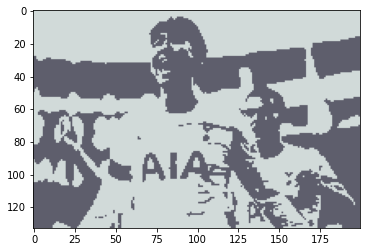

In [144]:
im_remastered = Image.fromarray(pixcels.reshape(height,width,3))
plt.imshow(im_remastered)
plt.show()

## END